# Introdução a Redes neurais com MLP

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

C:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

## 1. Aquisição de dados

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

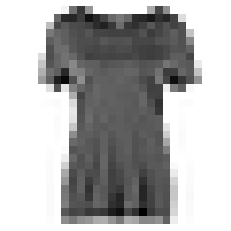

In [5]:
#testar diferentes exemplos
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

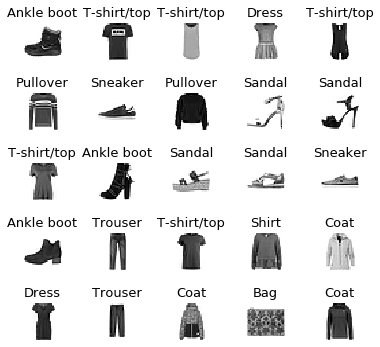

In [8]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

## 2. Pré-processamento

In [9]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

In [10]:
y_train.shape

(55000,)

In [12]:
X_train.shape

(55000, 28, 28)

## 3. Construindo a arquitetura

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
hidden1 = model.layers[1]

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights.shape

(784, 300)

In [24]:
biases.shape

(300,)

In [26]:
hidden2 = model.layers[2]

In [27]:
weights, biases = hidden2.get_weights()

In [28]:
weights.shape

(300, 100)

In [29]:
biases.shape

(100,)

In [31]:
output = model.layers[3]

In [32]:
weights, biases = output.get_weights()

In [33]:
weights.shape

(100, 10)

In [34]:
biases.shape

(10,)

## 4. Treinando a rede

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### 4.1. Parâmetros do treino

- loss="sparse_categorical_crossentropy"

Pr(Class A) | **Pr(Class B)** | Pr(Class C)

y_true = [1] -> 0.0       |   1.0        |  0.0  

Pr(Class A) | Pr(Class B) |  Pr(Class C)     

0.228     |     0.619        |   0.153

![Entropia Cruzada](https://miro.medium.com/max/480/1*loucyTXzGHuHi6D4PxjDlA.png)

Resp: 0.479 -> valor do erro da entropia cruzada

- optimizer="sgd" (Stochastic Gradient Descent)

![Gradiente Descendente](https://miro.medium.com/max/1398/1*IxMLWG1xsZ50b91M5VJXSA.jpeg) 
![title](gradient.png) 
![Taxa de Aprendizado](https://miro.medium.com/max/1050/1*vuMse7jQQXTcWZdQ9gRGCw.png) 
![Variações do Gradiente](https://miro.medium.com/max/1050/1*TD5xBpl6YP1McZoKBfVyDA.png) 

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7163 - accuracy: 0.7645 - val_loss: 0.5049 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4896 - accuracy: 0.8293 - val_loss: 0.4474 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4446 - accuracy: 0.8450 - val_loss: 0.4210 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8548 - val_loss: 0.4076 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3971 - accuracy: 0.8613 - val_loss: 0.3850 - val_accuracy: 0.8726
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3801 - accuracy: 0.8674 - val_loss: 0.4011 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3666 - accuracy: 0.8712 - val_loss: 0.3659 - val_accuracy:

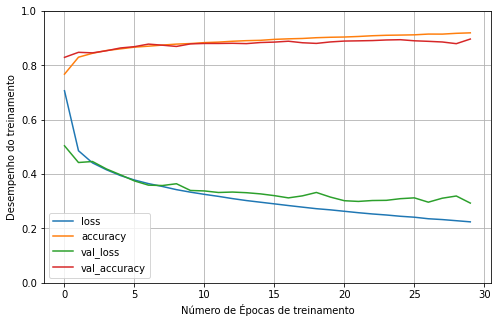

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7123 - accuracy: 0.7685 - val_loss: 0.4876 - val_accuracy: 0.8416
Epoch 2/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4854 - accuracy: 0.8320 - val_loss: 0.4428 - val_accuracy: 0.8540
Epoch 3/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4440 - accuracy: 0.8451 - val_loss: 0.4304 - val_accuracy: 0.8542
Epoch 4/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4161 - accuracy: 0.8544 - val_loss: 0.3892 - val_accuracy: 0.8672
Epoch 5/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8610 - val_loss: 0.4002 - val_accuracy: 0.8642
Epoch 6/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3816 - accuracy: 0.8652 - val_loss: 0.3765 - val_accuracy: 0.8676
Epoch 7/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8704 - val_loss: 0.3688 - val_accuracy:

In [14]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7139 - accuracy: 0.7641 - val_loss: 0.4986 - val_accuracy: 0.8332
Epoch 2/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4879 - accuracy: 0.8299 - val_loss: 0.4616 - val_accuracy: 0.8414
Epoch 3/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4423 - accuracy: 0.8448 - val_loss: 0.4328 - val_accuracy: 0.8526
Epoch 4/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4146 - accuracy: 0.8541 - val_loss: 0.3925 - val_accuracy: 0.8616
Epoch 5/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3955 - accuracy: 0.8617 - val_loss: 0.3751 - val_accuracy: 0.8702
Epoch 6/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8666 - val_loss: 0.4341 - val_accuracy: 0.8406
Epoch 7/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3648 - accuracy: 0.8710 - val_loss: 0.3718 - val_accuracy:

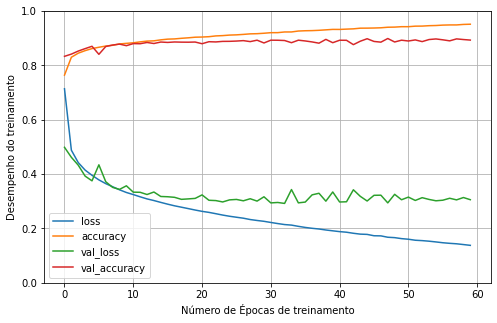

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5. Testando o modelo

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8819


[0.3349422812461853, 0.8819000124931335]

In [22]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.  , 0.03, 0.  , 0.01, 0.  , 0.61, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.93, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [19]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.8819
Kappa:  0.8687777777777779
Matriz de confusão: 
 [[880   0  23  21   6   1  58   0  11   0]
 [  3 967   1  24   3   0   2   0   0   0]
 [ 20   0 843  13  88   1  31   0   4   0]
 [ 21   8  20 891  42   0  14   0   4   0]
 [  0   1 108  22 846   0  18   0   5   0]
 [  0   0   0   0   0 948   0  30   2  20]
 [167   1 116  33 108   0 561   0  14   0]
 [  0   0   0   0   0  12   0 949   0  39]
 [  3   0  10   4   3   1   3   5 971   0]
 [  1   0   0   0   0   6   0  30   0 963]]


In [64]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 6. Salvando o modelo

In [23]:
model.save("modelo_mlp.h5")

In [24]:
model = keras.models.load_model("modelo_mlp.h5")

In [25]:
np.argmax(model.predict(X_test), axis=-1)

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [31]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1754 - accuracy: 0.9390 - val_loss: 0.3268 - val_accuracy: 0.8800
Epoch 2/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1719 - accuracy: 0.9399 - val_loss: 0.3005 - val_accuracy: 0.8926
Epoch 3/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1700 - accuracy: 0.9399 - val_loss: 0.3040 - val_accuracy: 0.8942
Epoch 4/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1671 - accuracy: 0.9406 - val_loss: 0.3055 - val_accuracy: 0.8910
Epoch 5/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1653 - accuracy: 0.9413 - val_loss: 0.3054 - val_accuracy: 0.8898
Epoch 6/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1620 - accuracy: 0.9426 - val_loss: 0.3120 - val_accuracy: 0.8944
Epoch 7/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1589 - accuracy: 0.9446 - val_loss: 0.2890 - val_accuracy:

$Atividade (2.5):$ Treine uma MLP profunda no conjunto de dados MNIST e veja se você consegue obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).